In [4]:
!pip install python-louvain

  Using cached python-louvain-0.16.tar.gz (204 kB)
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9398 sha256=422026a52c7358c61633efa8ba7977dba5803a170a89976e2d95491fb8213164
  Stored in directory: c:\users\cordelia laycock\appdata\local\pip\cache\wheels\af\40\91\ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain


In [13]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from community import community_louvain
#from movies.txt import final_df

sample_df = pd.read_csv("1%SampleDataset.csv")
full_df = pd.read_csv("CompleteDataWithGenres.csv")

data = {'Movie':['1', '2', '3', '2', '4', '5', '1', '2', '6', '4'],
        'User': ['a', 'a', 'a', 'b', 'b', 'c', 'd', 'c', 'd', 'c']}
test = pd.DataFrame(data)

G = nx.Graph()

In [14]:
#a variation of an exising function to account for repeated nodes
def my_add_node(movie1,graph):
    if movie1 in graph:
        return
    else:
        graph.add_node(movie1)

In [15]:
        
#a variation of an existing function to account for repeated edges
def my_add_edge(movie1, movie2, graph):
    if graph.has_edge(movie1, movie2):
        graph[movie1][movie2]['weight'] += 1
    else:
        graph.add_edge(movie1, movie2, weight = 1)
 

In [16]:
def main(df):
    df = df.reset_index()
    for i in tqdm(range(df.shape[0])):
        mc = df.at[i, 'Movie']
        my_add_node(mc, G)
        uc = df.at[i, 'User']
        df = df.drop(index = i)
        dfl = df.loc[df['User'] == uc] 
        lst = dfl['Movie'].tolist()
        for j in lst:
            my_add_node(j, G)
            my_add_edge(mc, j, G)
 

In [5]:
main(test)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 546.31it/s]


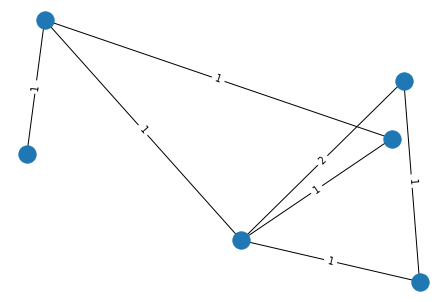

In [6]:
pos = nx.random_layout(G)
nx.draw(G, pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig('TestNetwork.png')
plt.show()

In [17]:
t = time.time()
main(sample_df)
print(time.time()-t)
nx.write_weighted_edgelist(G, 'CompleteNetwork.csv')
     

100%|███████████████████████████████████████████████████████████████████████████| 48027/48027 [03:16<00:00, 244.98it/s]


196.07117748260498


In [21]:
# gives dictionary with nodes as keys and values as corresponding community
division = community_louvain.best_partition(G)
# , {"B000NDFLWG":1, "B0002V7TJM":1, "B0002V7TJC":1, "6304474415":1, "1562229567":1, "B003BUAP10":1, "B000BB1NFO":1, "B000GAKJXM":1, "B008FPU7AA":2, "1888617047":3, "6305508569":4, "B0006FFRD4":5, "B00020HBN2":5, "B00020HBNW":5, "B00020HBNC":5, "B0012EM5GK":5}
print(division)

KeyError: '0964083817'

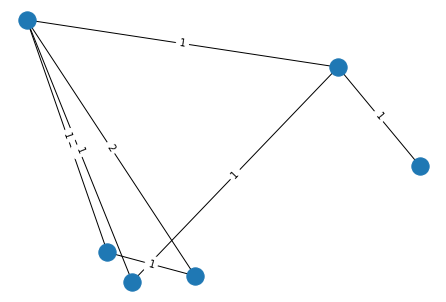

In [8]:
pos = nx.random_layout(G)
nx.draw(G, pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig('SampleNetwork.png')
plt.show()

In [ ]:
#this one tries to render the complete network
main(full_df) 